<h1>Oscilaciones armónicas y amortiguadas</h1>
<div align="right">David A. Miranda, PhD<br>2020</div>

## 1. Sistema masa resorte: movimiento armónico simple
Sea un objeto rectangular con masa $m$ ubicado sobre una superficie horizontal con coeficiente de rozamiento despreciable.  El objeto está sujeto a la pared por medio de un resorte con constante elástica $k$.  Si en $t = t_0$ el resorte se encuentra con su elongación natural, es decir, el sistema está en su posición de equilibrio y en $t = t_1 > t_0$ el objeto se encuentra en movimiento hacia la izquierda, describa el movimiento de objeto con masa $m$.

![](https://docs.google.com/drawings/d/e/2PACX-1vQJ2ARZPVrMfGKKrxMnxkfG4n9uetVnYvsoRdK8jMvj6yxm1oyEBYa4v9UR5r7bRvkOZM30LDuw4ns3/pub?w=784&amp;h=541)


Al aplicar la segunda ley de Newton al sistema, se obtiene que la suma de fuerzas en $x$ es igual al producto de la masa $m$ por la aceleración $a_x$.  La aceleración corresponde con la variación de la velocidad $v_x$ respecto a la variación del tiempo, $a_x = dv_x/dt$, donde la velocidad es la variación de la posición $x$ respecto a la variación del tiempo, $v_x= dx/dt$, por consiguiente, $$a=\frac{d^2x}{dt^2}$$

La única fuerza presente es la fuerza elástica $F = -k\delta$, que actúa como una fuerza de restitución, es decir, se opone al movimiento.  

Si asumimos que el sistema de referencia coincide con la posición de equilibrio ($t=t_0$), entonces, $\delta = x$ y la ecuación que describe el movimiento del objeto está dada por $ma = -kx$, que corresponde con la siguiente ecuación diferencial:

$$\frac{d^2x}{dt^2} + \frac{k}{m}x =0$$

Donde, 

$$x = x_0 sen(\omega t)$$
$$\omega = \sqrt{\frac{k}{m}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

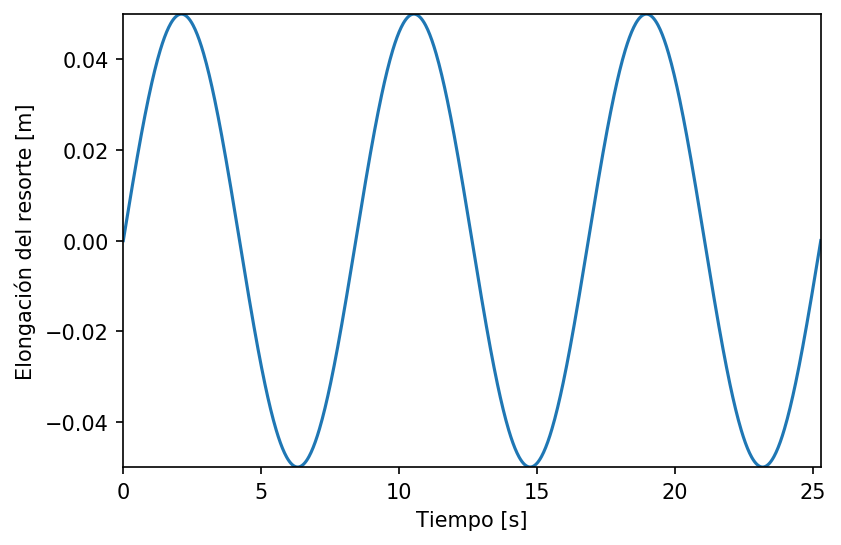

In [2]:
k  = 1.0  # N/m  : Constante elástica del resorte
m  = 1.8  # kg   : Masa del objeto
x0 = 0.05 # m    : Amplitud de la oscilación

N = 3 # Número de periodos a graficar

ω = np.sqrt(k/m) # Frecuencia angular
T = 2*np.pi/ω    # Periodo

t = np.linspace(0, N*T, 1000)
x = x0 * np.sin(ω*t)

plt.figure(dpi=150)
plt.plot(t, x)
plt.xlabel('Tiempo [s]')
plt.ylabel('Elongación del resorte [m]')
_ = plt.axis([min(t), max(t), min(x), max(x)])

## 2. Sistema masa resorte con amortiguamiento

Suponga al sistema masa resorte descrito en el ítem 1 se agrega una fuerza de amortiguamiento $F_\gamma$ proporcional a la velocidad del objeto, $v$, donde $\gamma$ es el coeficiente de amortiguamiento.

$$F_\gamma = -\gamma v = -\gamma \frac{d\gamma}{dt}$$

La ecuación que describe el movimiento del sistema está dada por la segunda ley de Newton, $a = -kx - \gamma v$, que corresponde con la siguiente ecuación diferencial,

$$\frac{d^2x}{dt^2} + \frac{\gamma}{m}\frac{dx}{dt} + \frac{k}{m}x = 0$$

Si se hace $\omega_0^2 = \frac{k}{m}$ y $\beta = \frac{\gamma}{2m}$, se obtiene,

$$\frac{d^2x}{dt^2} + \beta\frac{dx}{dt} + \omega^2x = 0$$

La solución de esta ecuación está dada por:

$$x(t)=x_+ e^{s_+t}+x_-e^{s_-t}$$

Donde,

$$s_{\pm} = -\beta \pm \sqrt{\beta^2-\omega_o^2}$$

### 2.1. Caso sub-amortiguado, $\omega_0 > \beta$

Periodo: T = 8.71 s


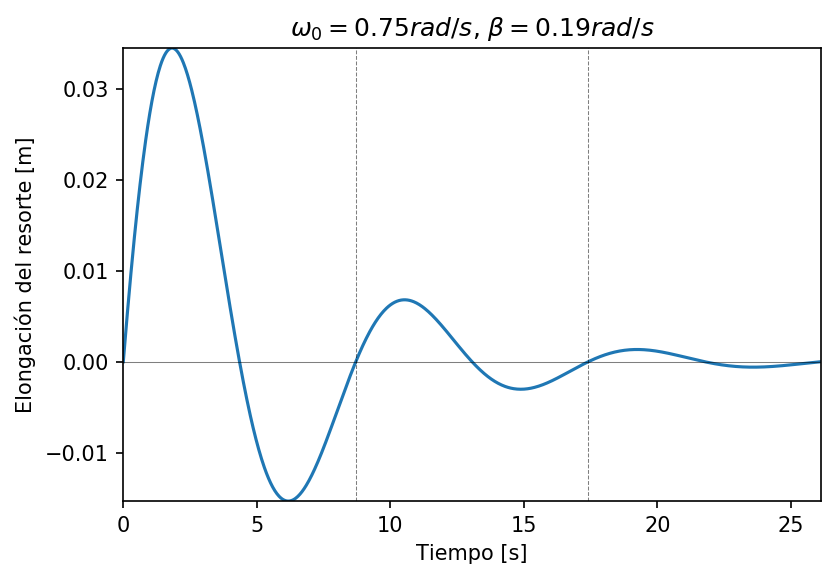

In [3]:
k  = 1.0  # N/m  : Constante elástica del resorte
m  = 1.8  # kg   : Masa del objeto
x0 = 0.05 # m    : Amplitud de la oscilación

N = 3 # Número de periodos a graficar

ω0 = np.sqrt(k/m)
β  = ω0 / 4

ω = np.sqrt(ω0**2 - β**2)
T = 2*np.pi/ω

t = np.linspace(0, N*T, 1000)
x = x0 * np.exp(-β*t)*np.sin(ω*t)

print('Periodo: T = %0.2f s' % T)

plt.figure(dpi=150)
plt.plot(t, x)
for k in range(N):
    n = k+1
    plt.plot([n*T, n*T], [x.min(), x.max()], '--k', alpha=0.5, lw=0.5)
plt.plot([t.min(), t.max()], [0, 0], 'k', lw=0.5, alpha=0.5)
plt.xlabel('Tiempo [s]')
plt.ylabel('Elongación del resorte [m]')
_ = plt.axis([min(t), max(t), min(x), max(x)])
_ = plt.title(r'$\omega_0 = %0.2f rad/s$, $\beta = %0.2f rad/s$' % (ω0, β))

### 2.2. Caso críticamente amortiguado, $\omega = \beta$

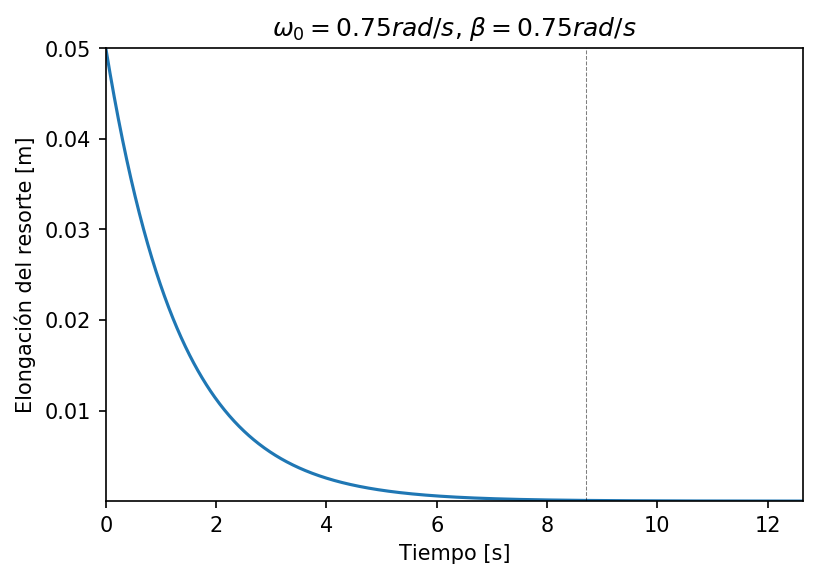

In [4]:
k  = 1.0  # N/m  : Constante elástica del resorte
m  = 1.8  # kg   : Masa del objeto
x0 = 0.05 # m    : Amplitud de la oscilación

N = 3 # Número de periodos a graficar

ω0 = np.sqrt(k/m)
β  = ω0

t = np.linspace(0, N*np.pi/β, 1000)
x = x0 * np.exp(-β*t)

plt.figure(dpi=150)
plt.plot(t, x)
for k in range(N):
    n = k+1
    plt.plot([n*T, n*T], [x.min(), x.max()], '--k', alpha=0.5, lw=0.5)
plt.plot([t.min(), t.max()], [0, 0], 'k', lw=0.5, alpha=0.5)
plt.xlabel('Tiempo [s]')
plt.ylabel('Elongación del resorte [m]')
_ = plt.axis([min(t), max(t), min(x), max(x)])
_ = plt.title(r'$\omega_0 = %0.2f rad/s$, $\beta = %0.2f rad/s$' % (ω0, β))

### 2.3. Caso sobre-amortiguado, $\omega_0 < \beta$

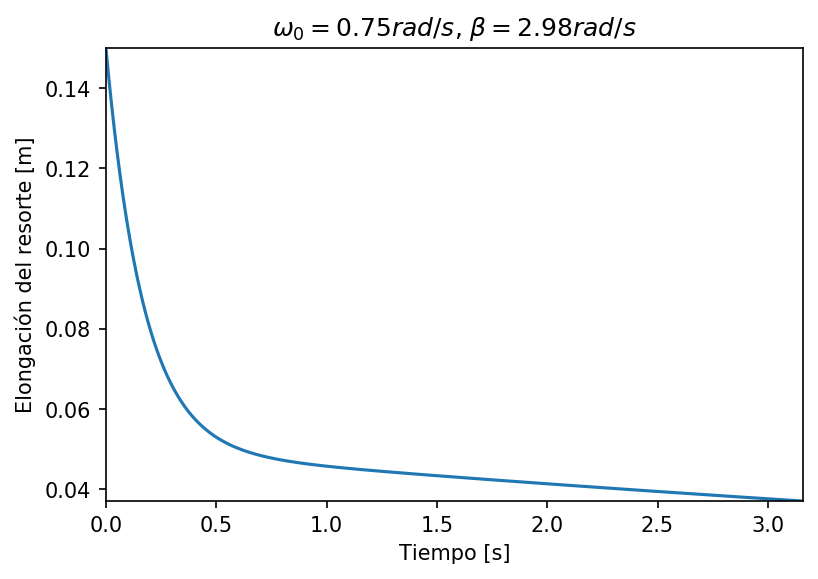

In [5]:
k  = 1.0  # N/m  : Constante elástica del resorte
m  = 1.8  # kg   : Masa del objeto
x1 = 0.05 # m    : Condición inicial
x2 = 0.10 # m    : Condición inicial

N = 3 # Número de periodos a graficar

ω0 = np.sqrt(k/m)
β  = ω0 * 4

t = np.linspace(0, N*np.pi/β, 1000)
s1 = -β + np.sqrt(β**2 - ω0**2)
s2 = -β - np.sqrt(β**2 - ω0**2)

x = x1 * np.exp(s1*t) + x2 * np.exp(s2*t)

plt.figure(dpi=150)
plt.plot(t, x)
for k in range(N):
    n = k+1
    plt.plot([n*T, n*T], [x.min(), x.max()], '--k', alpha=0.5, lw=0.5)
plt.plot([t.min(), t.max()], [0, 0], 'k', lw=0.5, alpha=0.5)
plt.xlabel('Tiempo [s]')
plt.ylabel('Elongación del resorte [m]')
_ = plt.axis([min(t), max(t), min(x), max(x)])
_ = plt.title(r'$\omega_0 = %0.2f rad/s$, $\beta = %0.2f rad/s$' % (ω0, β))

End!